# Clustering Activity

In [58]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score
import skfuzzy.cluster as fuzz
import numpy as np
import pandas as pd

# Generate a hypothetical dataset
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

Exercise: Evaluate four clustering algorithms (K-Means, Fuzzy C-Means, Spectral, and Agglomerative)
1. Apply each clustering algorithm to the dataset where:
- cluster_count = 4
- random_state = 42 (where applicable)
- do not specify affinity, metric, algo, init, linkage (if applicable)
2. Use the **Adjusted Rand index** and **Silhouette Score** to evaluate the clustering performance.
3. Compare the performance of the algorithms based on the aforementioned metrics and decide which algorithm is best suited for the data given.

In [59]:

def make_donut_data(num_classes=4, num_samples=100, radius_delta=1):
    circle_all = np.array([])
    class_lbls = np.array([])
    
    current_radius = radius_delta * num_classes

    for i in range(num_classes):
        theta = inner_theta = np.random.uniform(0, 2*np.pi, num_samples)

        # Donut data
        circle_x = current_radius * np.cos(theta)
        circle_y = current_radius * np.sin(theta)

        circle_indiv = np.array([circle_x, circle_y]).T
        circle_all = np.vstack((circle_all, circle_indiv)) if circle_all.size else circle_indiv

        class_indiv = np.full(num_samples, i)
        class_lbls = np.concatenate((class_lbls, class_indiv)) if class_lbls.size else class_indiv

        current_radius = current_radius - radius_delta

        
    return circle_all, class_lbls

def make_sinusoidal_wave(amplitude=1, frequency=1.5, phase=0, num_samples=100, num_classes=4, y_difference = 2):
    # Generating x values
    x = np.linspace(0, 4 * np.pi, num_samples)

    x_all = np.array([])
    y_all = np.array([])

    class_lbls = np.array([])

    diff = 0

    # Calculating the sinusoidal wave
    for i in range(num_classes):
        x_all = np.concatenate((x_all, [x]), axis=1) if x_all.size else np.array([x])

        y_indiv = amplitude * np.sin(frequency * x + phase) + diff
        y_all = np.concatenate((y_all, [y_indiv]), axis=1) if y_all.size else np.array([y_indiv])
        diff = diff + y_difference

        class_indiv = np.full(num_samples, i)
        class_lbls = np.concatenate((class_lbls, class_indiv)) if class_lbls.size else class_indiv

    return np.vstack((x_all, y_all)).T, class_lbls

def make_pinwheel_data(num_samples=100, num_classes=4, radius=1, stddev=0):
    # Generating the data for the pinwheel
    angle = np.linspace(0, 2 * np.pi, num_samples)
    data = np.zeros((num_samples * num_classes, 2))
    class_lbls = np.array([])
    for i in range(num_classes):
        ix = range(num_samples * i, num_samples * (i + 1))
        r = np.linspace(0.0, radius, num_samples) + np.random.normal(0, stddev, num_samples)
        data[ix] = np.c_[r * np.cos(angle + i * (2 * np.pi) / num_classes),
                         r * np.sin(angle + i * (2 * np.pi) / num_classes)]

        class_indiv = np.full(num_samples, i)
        class_lbls = np.concatenate((class_lbls, class_indiv)) if class_lbls.size else class_indiv

    return data, class_lbls

def make_bar_data(num_samples=100, num_classes=4, x_init = 0.0, y = 0.5, distance_delta = 1):
    # Generating points for bars
    x = x_init
    bar_all = y_all = np.array([])
    class_lbls = np.array([])
    
    for i in range(num_classes):
        bar_indiv = np.random.rand(num_samples, 2) * 0.5 + np.array([x, y])
        bar_all = np.vstack((bar_all, bar_indiv)) if bar_all.size else bar_indiv
        x = x + distance_delta

        class_indiv = np.full(num_samples, i)
        class_lbls = np.concatenate((class_lbls, class_indiv)) if class_lbls.size else class_indiv

    return bar_all, class_lbls

def get_card_data():
    df = pd.read_csv('data/credit_card.csv')
    # Dropping the CUST_ID column from the data
    df = df.drop('CUST_ID', axis = 1)
    # Handling the missing values if any
    df.fillna(method ='ffill', inplace = True)

    # Preprocessing the data to make it visualizable
 
    # Scaling the Data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    
    # Normalizing the Data
    X_normalized = normalize(X_scaled)
    
    # Converting the numpy array into a pandas DataFrame
    X_normalized = pd.DataFrame(X_normalized)
    
    # Reducing the dimensions of the data
    pca = PCA(n_components = 2)
    X_principal = pca.fit_transform(X_normalized)
    X_principal = pd.DataFrame(X_principal)
    X_principal.columns = ['P1', 'P2']
    
    
    return np.array(X_principal), None

In [60]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

#define the colors to be used in the plots
colors = ['red', 'orange', 'lime', 'green', 'blue', 'navy', 'violet']
fig_size = 6

# Params of Data Generation
samples = 500  # Number of samples per class
classes = 5     # Number of classes

X, Y = make_sinusoidal_wave(num_samples=samples, num_classes=classes)

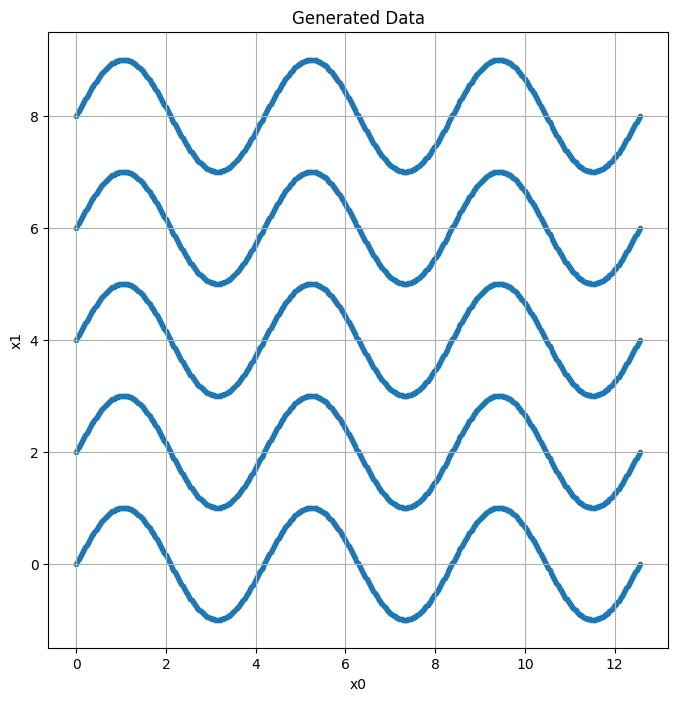

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))

plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Generated Data')
plt.grid()
plt.show()

### K-Means Clustring Code

Adjusted Rand Score        = 0.21 - KMeans CLustering - init=k-means++ algorithm=lloyd
Silhouette Score           = 0.39 - KMeans CLustering - init=k-means++ algorithm=lloyd

Adjusted Rand Score        = 0.28 - KMeans CLustering - init=k-means++ algorithm=elkan
Silhouette Score           = 0.36 - KMeans CLustering - init=k-means++ algorithm=elkan

Adjusted Rand Score        = 0.21 - KMeans CLustering - init=random algorithm=lloyd
Silhouette Score           = 0.39 - KMeans CLustering - init=random algorithm=lloyd

Adjusted Rand Score        = 0.21 - KMeans CLustering - init=random algorithm=elkan
Silhouette Score           = 0.39 - KMeans CLustering - init=random algorithm=elkan



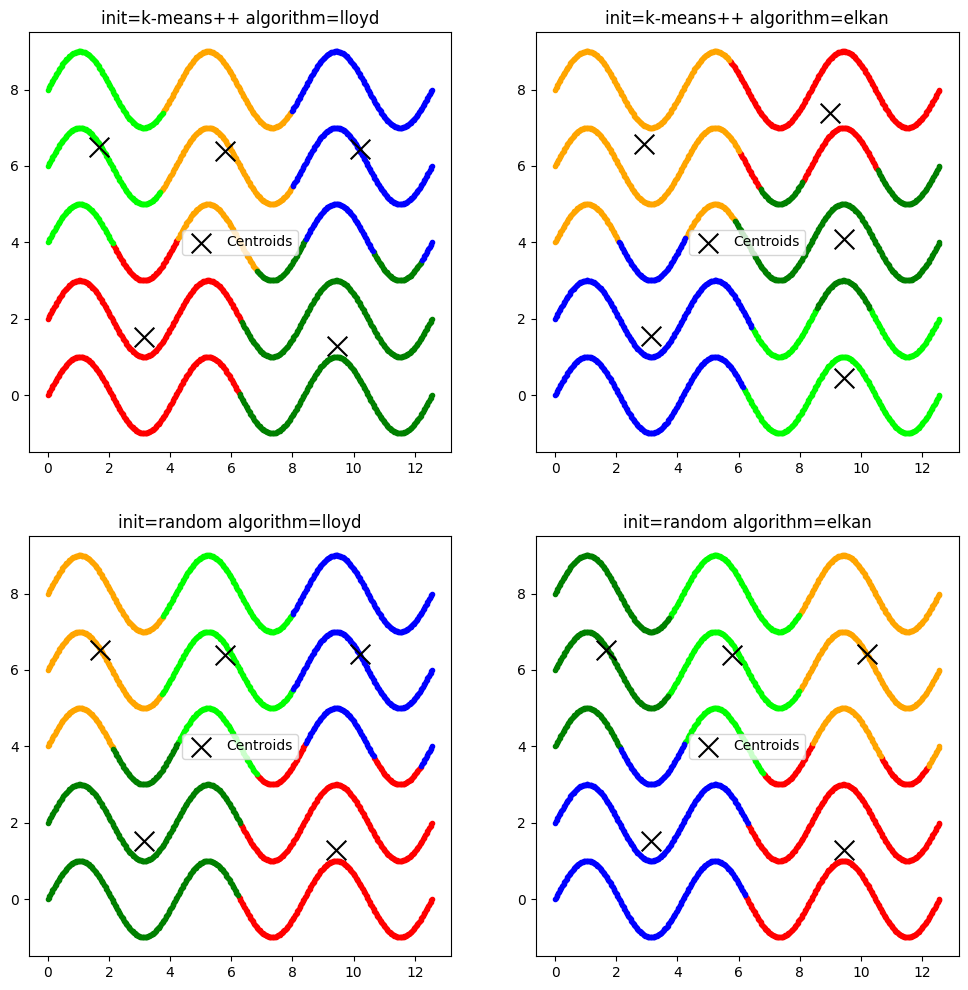

In [62]:
from sklearn.cluster import KMeans

init_array = ['k-means++', 'random']
algo_array = ['lloyd', 'elkan']

fig, axs = plt.subplots(len(init_array), len(algo_array), figsize=(fig_size * len(init_array), fig_size * len(algo_array)))

for i, init in enumerate(init_array):
    for j, algo in enumerate(algo_array):
        ax = axs[i, j]

        model = KMeans(n_clusters=classes, init=init, algorithm=algo, n_init='auto').fit(X)
        targ = model.predict(X)

        for idx, cl in enumerate(np.unique(targ)):
            ax.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')

        centroids = model.cluster_centers_
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
        ax.legend()
        ax.set_title(f"init={init} algorithm={algo}")

        if Y is not None:
            print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f} - KMeans CLustering - init={init} algorithm={algo}")
        print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - KMeans CLustering - init={init} algorithm={algo}\n")
plt.show()

### Fuzzy C-Means Clustering Code

             0         1         2         3         4
0     0.000044  0.004650  0.000283  0.000648  0.994376
1     0.000041  0.004470  0.000265  0.000617  0.994608
2     0.000038  0.004296  0.000248  0.000587  0.994831
3     0.000036  0.004126  0.000232  0.000559  0.995047
4     0.000034  0.003962  0.000217  0.000531  0.995256
...        ...       ...       ...       ...       ...
2495  0.999131  0.000013  0.000306  0.000542  0.000009
2496  0.999056  0.000014  0.000330  0.000590  0.000010
2497  0.998975  0.000015  0.000356  0.000643  0.000011
2498  0.998889  0.000017  0.000383  0.000699  0.000012
2499  0.998798  0.000019  0.000412  0.000758  0.000013

[2500 rows x 5 columns]
Adjusted Rand Score        = 0.21 - Fuzzy C-Means
Silhouette Score           = 0.39 - Fuzzy C-Means



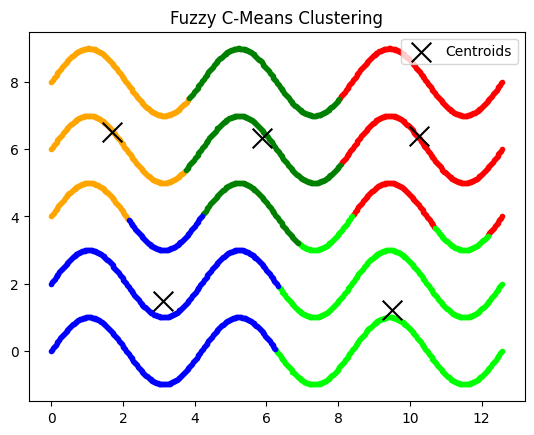

In [63]:
from skfuzzy import cmeans, cmeans_predict

centers, u, u0, d, jm, p, fpc = cmeans(data = X.T, c = classes, m = 1.25, error = 0.05, maxiter = 1000)
target2 = np.argmax(u, axis=0)

for idx, cl in enumerate(np.unique(target2)):
    plt.scatter(X[target2 == cl, 0], X[target2 == cl, 1], color=colors[idx], marker='.')
    
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.legend()
plt.title("Fuzzy C-Means Clustering")

# Printing membership matrix
print(pd.DataFrame(u.T))

if Y is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(target2, Y):.2f} - Fuzzy C-Means")
print(f"Silhouette Score           = {silhouette_score(X, target2):.2f} - Fuzzy C-Means\n")

### Spectral Clustering Code

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Adjusted Rand Score        = 0.50 - Spectral Clustering - nearest_neighbors
Silhouette Score           = 0.06 - Spectral Clustering - nearest_neighbors

Adjusted Rand Score        = 0.11 - Spectral Clustering - rbf
Silhouette Score           = 0.33 - Spectral Clustering - rbf

Adjusted Rand Score        = 0.00 - Spectral Clustering - poly
Silhouette Score           = 0.12 - Spectral Clustering - poly

Adjusted Rand Score        = 0.00 - Spectral Clustering - polynomial
Silhouette Score           = 0.12 - Spectral Clustering - polynomial

Adjusted Rand Score        = 0.10 - Spectral Clustering - laplacian
Silhouette Score           = 0.32 - Spectral Clustering - laplacian

Adjusted Rand Score        = 0.02 - Spectral Clustering - sigmoid
Silhouette Score           = 0.01 - Spectral Clustering - sigmoid



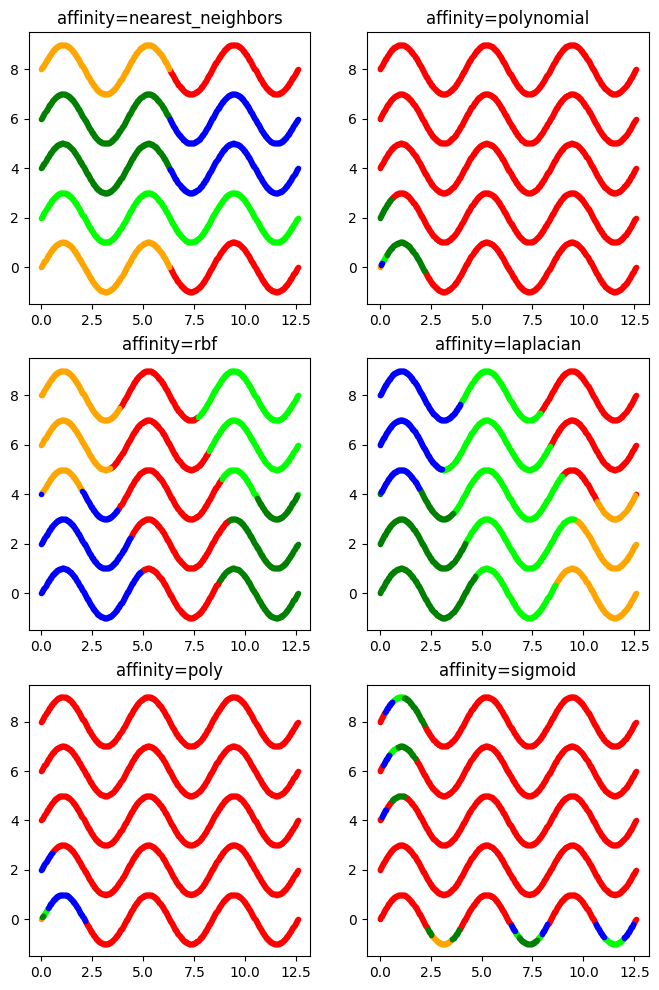

In [64]:
from sklearn.cluster import SpectralClustering

aff_array = ['nearest_neighbors', 'rbf', 'poly', 
                'polynomial', 'laplacian', 'sigmoid']
# you can use these kernels for affinity but they dont always work
# ['additive_chi2', 'chi2', 'linear', 'cosine']

fig, axs = plt.subplots(3, 2, figsize=(8, 12))

for i, aff in enumerate(aff_array):
    m = int(i / (len(aff_array) / 2))
    n = int(i % (len(aff_array) / 2))
    ax = axs[n, m]

    targ = SpectralClustering(n_clusters=classes, affinity=aff, gamma=0.5).fit_predict(X)

    for idx, cl in enumerate(np.unique(targ)):
        ax.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')
        ax.set_title(f"affinity={aff}")

    if Y is not None:
        print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f} - Spectral Clustering - {aff}")
    print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - Spectral Clustering - {aff}\n")
plt.show()

### Agglomerative Clustering Code

Adjusted Rand Score        = 0.22 - Agglomerative Clustering - linkage=complete metric=cityblock
Silhouette Score           = 0.32 - Agglomerative Clustering - linkage=complete metric=cityblock

Adjusted Rand Score        = 0.24 - Agglomerative Clustering - linkage=average metric=cityblock
Silhouette Score           = 0.35 - Agglomerative Clustering - linkage=average metric=cityblock

Adjusted Rand Score        = 1.00 - Agglomerative Clustering - linkage=single metric=cityblock
Silhouette Score           = 0.08 - Agglomerative Clustering - linkage=single metric=cityblock

Adjusted Rand Score        = 0.22 - Agglomerative Clustering - linkage=complete metric=l1
Silhouette Score           = 0.32 - Agglomerative Clustering - linkage=complete metric=l1

Adjusted Rand Score        = 0.24 - Agglomerative Clustering - linkage=average metric=l1
Silhouette Score           = 0.35 - Agglomerative Clustering - linkage=average metric=l1

Adjusted Rand Score        = 1.00 - Agglomerative Clustering 

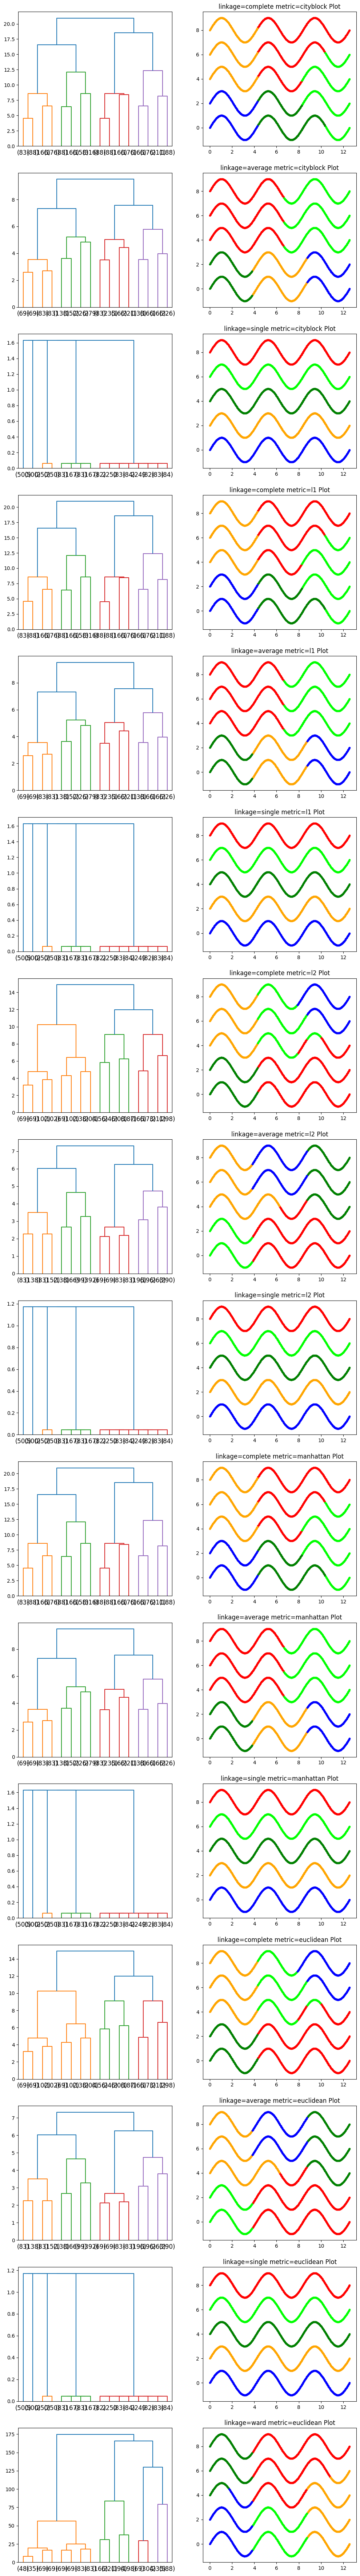

In [65]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

def plot_data(model, lin, met, ax):
    model.set_params(n_clusters=classes, distance_threshold=None)
    targ = model.fit_predict(X)
    
    if Y is not None: 
        print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f} - Agglomerative Clustering - linkage={lin} metric={met}")
    print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - Agglomerative Clustering - linkage={lin} metric={met}\n")

    for idx, cl in enumerate(np.unique(targ)):
        ax.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')
        ax.set_title(f"linkage={lin} metric={met} Plot")
        

met_array = ['cityblock', 'l1', 'l2', 'manhattan', 'euclidean']
lin_array = ['complete', 'average', 'single'] # 'ward' only works on euclidian thus it is appended only in the end

fig, axs = plt.subplots(len(lin_array) * len(met_array) + 1, 2, figsize=(fig_size * 2, fig_size * len(lin_array) * len(met_array) + 1))

m = 0
for i, met in enumerate(met_array):
    if(met == 'euclidean'):
        lin_array.append('ward')
    for j, lin in enumerate(lin_array):
        model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=lin, metric=met)
        model = model.fit(X)

        plot_dendrogram(model, truncate_mode="level", p=3, ax=axs[m, 0])
        plot_data(model, lin, met, ax=axs[m, 1])
        m = m + 1

plt.show()